# Finance Exercises: Factor Models

Given a stock, the daily return of a stock today is today's closing price divided by yesterday's closing price; we then subtract 1 and multiply by 100 to get a percentage.

One of the most well-known factor models is the Capital Asset Pricing Model (CAPM), which takes the form: $E[R_s]=R_f +\beta(E[R_m]−R_f)$. Here, $R_s$ is the return for some security of interest, $R_m$ is the return for some market index such as the S&P500. $R_f$ is the risk-free return, typically the interest rate on US treasuries or assumed to be zero for simplicity.

This is really just a simple linear regression and $\beta$ is the slope for the "line of best fit." With simple linear regression, $\beta$ is just $\text{Cov}(E[R_s],E[R_m])/\text{Var}(E[R_m])$ where I'm thinking of these as arrays containing finitely many points of historic data telling us about the returns.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the ticker symbol
ticker_symbol = "AAPL" # Apple

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data)

# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-12-04 00:00:00-05:00  189.053791  189.123457  186.536127  188.506470   
2023-12-05 00:00:00-05:00  189.282708  193.452269  189.252841  192.477051   
2023-12-06 00:00:00-05:00  193.502021  193.810508  191.173433  191.382416   
2023-12-07 00:00:00-05:00  192.686042  194.049359  192.646229  193.322922   
2023-12-08 00:00:00-05:00  193.253242  195.034524  192.725827  194.755890   
...                               ...         ...         ...         ...   
2024-11-25 00:00:00-05:00  231.460007  233.250000  229.740005  232.869995   
2024-11-26 00:00:00-05:00  233.330002  235.570007  233.330002  235.059998   
2024-11-27 00:00:00-05:00  234.470001  235.690002  233.809998  234.929993   
2024-11-29 00:00:00-05:00  234.809998  237.809998  233.970001  237.330002   
2024-12-02 00:00:00-05:00  237.270004  240.789993  237.1600

In [3]:
apple=pd.DataFrame(historical_data)

In [4]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-04 00:00:00-05:00,189.053791,189.123457,186.536127,188.506470,43389500,0.0,0.0
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0
2023-12-06 00:00:00-05:00,193.502021,193.810508,191.173433,191.382416,41089700,0.0,0.0
2023-12-07 00:00:00-05:00,192.686042,194.049359,192.646229,193.322922,47477700,0.0,0.0
2023-12-08 00:00:00-05:00,193.253242,195.034524,192.725827,194.755890,53377300,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,231.460007,233.250000,229.740005,232.869995,90152800,0.0,0.0
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,0.0,0.0


In [5]:
apple['Daily Returns %'] = ((apple['Close']/apple['Close'].shift(1))-1)*100

In [6]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-12-04 00:00:00-05:00,189.053791,189.123457,186.536127,188.506470,43389500,0.0,0.0,NaN
2023-12-05 00:00:00-05:00,189.282708,193.452269,189.252841,192.477051,66628400,0.0,0.0,2.106337
2023-12-06 00:00:00-05:00,193.502021,193.810508,191.173433,191.382416,41089700,0.0,0.0,-0.568709
2023-12-07 00:00:00-05:00,192.686042,194.049359,192.646229,193.322922,47477700,0.0,0.0,1.013942
2023-12-08 00:00:00-05:00,193.253242,195.034524,192.725827,194.755890,53377300,0.0,0.0,0.741230
...,...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,231.460007,233.250000,229.740005,232.869995,90152800,0.0,0.0,1.305086
2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0,0.940440
2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,0.0,0.0,-0.055307


In [7]:
# market index
SP500 = yf.Ticker('^GSPC')

# Fetch historical market data
historical_data2 = SP500.history(period="1y")  # data for the last year
print("Historical Data:")
print(historical_data2)

Historical Data:
                                  Open         High          Low        Close  \
Date                                                                            
2023-12-04 00:00:00-05:00  4564.370117  4572.370117  4546.720215  4569.779785   
2023-12-05 00:00:00-05:00  4557.250000  4578.560059  4551.680176  4567.180176   
2023-12-06 00:00:00-05:00  4586.229980  4590.740234  4546.500000  4549.339844   
2023-12-07 00:00:00-05:00  4568.839844  4590.919922  4565.220215  4585.589844   
2023-12-08 00:00:00-05:00  4576.200195  4609.229980  4574.060059  4604.370117   
...                                ...          ...          ...          ...   
2024-11-25 00:00:00-05:00  5992.279785  6020.750000  5963.910156  5987.370117   
2024-11-26 00:00:00-05:00  6000.029785  6025.419922  5992.270020  6021.629883   
2024-11-27 00:00:00-05:00  6014.109863  6020.160156  5984.870117  5998.740234   
2024-11-29 00:00:00-05:00  6003.979980  6044.169922  6003.979980  6032.379883   
2024-12-02 

In [8]:
sp500 = pd.DataFrame(historical_data2)

In [9]:
sp500['Daily Returns %'] = ((sp500['Close']/sp500['Close'].shift(1))-1)*100

In [10]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Returns %
Date,,,,,,,,
2023-12-04 00:00:00-05:00,4564.370117,4572.370117,4546.720215,4569.779785,4369910000,0.0,0.0,NaN
2023-12-05 00:00:00-05:00,4557.250000,4578.560059,4551.680176,4567.180176,3909950000,0.0,0.0,-0.056887
2023-12-06 00:00:00-05:00,4586.229980,4590.740234,4546.500000,4549.339844,4245680000,0.0,0.0,-0.390620
2023-12-07 00:00:00-05:00,4568.839844,4590.919922,4565.220215,4585.589844,3818880000,0.0,0.0,0.796819
2023-12-08 00:00:00-05:00,4576.200195,4609.229980,4574.060059,4604.370117,3707010000,0.0,0.0,0.409550
...,...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,5992.279785,6020.750000,5963.910156,5987.370117,5633150000,0.0,0.0,0.302048
2024-11-26 00:00:00-05:00,6000.029785,6025.419922,5992.270020,6021.629883,3835170000,0.0,0.0,0.572201
2024-11-27 00:00:00-05:00,6014.109863,6020.160156,5984.870117,5998.740234,3363340000,0.0,0.0,-0.380124


In [11]:
# getting just the daily returns (and dropping the 'NaN' values)

sp500_daily_returns = sp500['Daily Returns %'].values
sp500_daily_returns=sp500_daily_returns[1:]

In [12]:
apple_daily_returns = apple['Daily Returns %'].values
apple_daily_returns=apple_daily_returns[1:]


In [13]:
matrix = np.cov(apple_daily_returns,sp500_daily_returns)

In [14]:
# covariance divided by variance of market return
matrix[0][1]/matrix[1][1]

0.9788540409871057

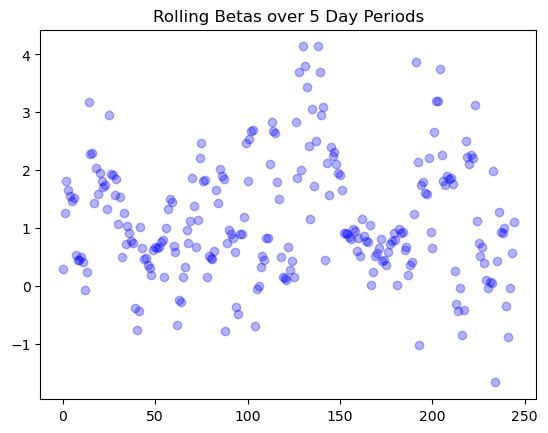

In [15]:
# Let's compute a "rolling" beta where we compute beta for a course of 5 days
n=5
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

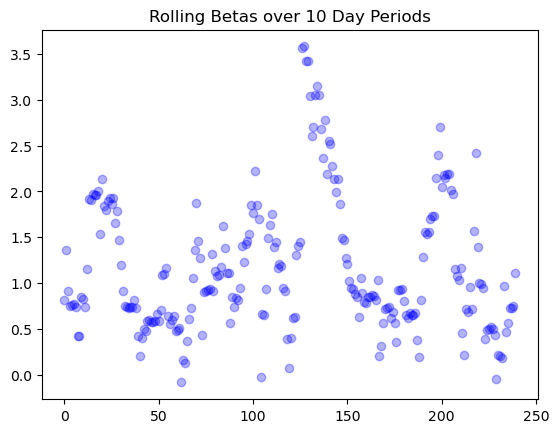

In [16]:
# Let's compute a "rolling" beta where we compute beta for a course of 10 days
n=10
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

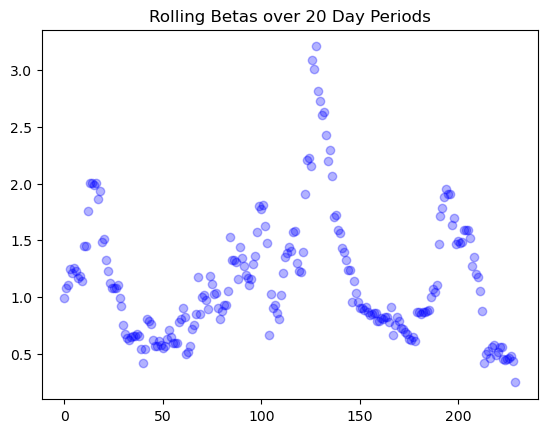

In [17]:
# Let's compute a "rolling" beta where we compute beta for a course of 20 days
n=20
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

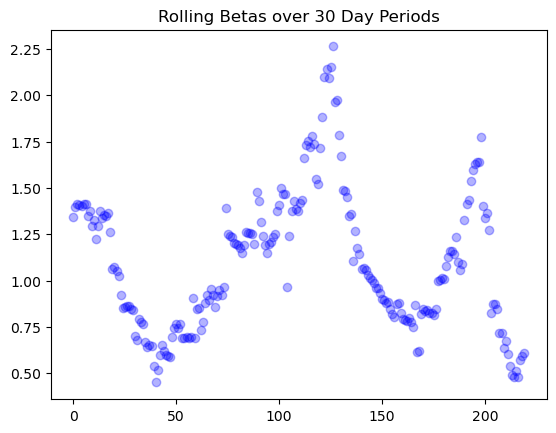

In [18]:
# Let's compute a "rolling" beta where we compute beta for a course of 30 days
n=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])
l = np.arange(0,len(betas),1)
plt.scatter(l,betas, color = 'b', alpha = 0.3)

plt.title(f'Rolling Betas over {n} Day Periods')
plt.show()

It definitely seems there is some kind of periodic behavior or trend

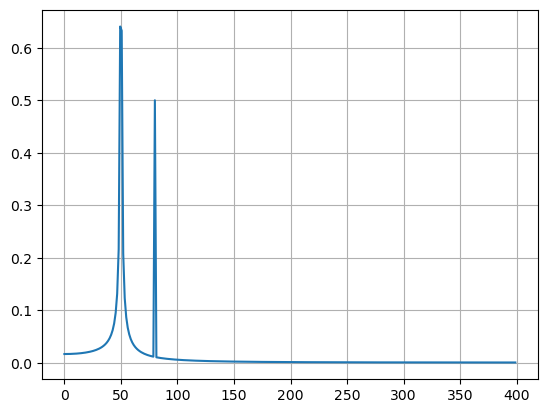

In [19]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Trying Prophet for forecasting

In [2]:
from prophet import Prophet

In [21]:
n=5
betas = []

for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])

In [22]:
# the date was the index, now it becomes a column
sp500.reset_index(inplace=True)

In [23]:
dates=sp500['Date'].values

In [24]:
len(dates)

251

In [25]:
len(betas)

245

In [26]:
dates = dates[:-6]

In [27]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [28]:
X

,ds,y
0,2023-12-04 05:00:00,0.290250
1,2023-12-05 05:00:00,1.258485
2,2023-12-06 05:00:00,1.811894
3,2023-12-07 05:00:00,1.650134
4,2023-12-08 05:00:00,1.560563
...,...,...
240,2024-11-15 05:00:00,-0.348338
241,2024-11-18 05:00:00,-0.886241
242,2024-11-19 05:00:00,-0.039080
243,2024-11-20 05:00:00,0.574364


In [29]:
m=Prophet()

In [30]:
m.fit(X)

20:05:54 - cmdstanpy - INFO - Chain [1] start processing
20:05:54 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future=m.make_future_dataframe(periods=5)

In [32]:
forecast=m.predict(future)

In [33]:
X[-10:]

,ds,y
235,2024-11-08 05:00:00,0.430524
236,2024-11-11 05:00:00,1.282077
237,2024-11-12 05:00:00,0.927798
238,2024-11-13 05:00:00,0.923124
239,2024-11-14 05:00:00,0.992933
240,2024-11-15 05:00:00,-0.348338
241,2024-11-18 05:00:00,-0.886241
242,2024-11-19 05:00:00,-0.039080
243,2024-11-20 05:00:00,0.574364
244,2024-11-21 05:00:00,1.099449


In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
235,2024-11-08 05:00:00,1.081342,-0.252926,2.404618
236,2024-11-11 05:00:00,1.127592,-0.193765,2.365011
237,2024-11-12 05:00:00,1.152056,-0.166822,2.509323
238,2024-11-13 05:00:00,1.240255,0.053401,2.530364
239,2024-11-14 05:00:00,1.075037,-0.412053,2.446353
240,2024-11-15 05:00:00,1.080634,-0.236303,2.371125
241,2024-11-18 05:00:00,1.126884,-0.215450,2.457586
242,2024-11-19 05:00:00,1.151348,-0.152609,2.477436
243,2024-11-20 05:00:00,1.239547,-0.119449,2.580942
244,2024-11-21 05:00:00,1.074328,-0.204988,2.526532


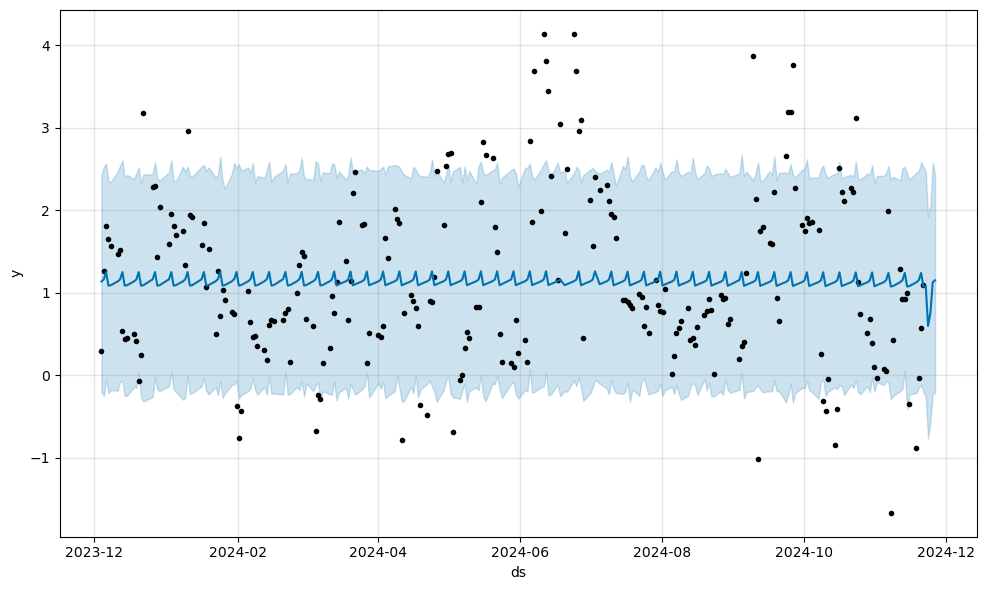

In [35]:
fig=m.plot(forecast)

I'm not sure why the prediction has such small and consistent oscillations...I am just using the Prophet "out of the box" without tuning hyperparameters.

In [36]:
# Let's compute a "rolling" beta where we compute beta for a course of 30 days
n=30
betas = []
for i in range(len(sp500_daily_returns)-n):
    matrix = np.cov(apple_daily_returns[i:i+n],sp500_daily_returns[i:i+n])
    betas.append(matrix[0][1]/matrix[1][1])


In [37]:
dates=sp500['Date'].values

In [38]:
dates = dates[:-31]

In [39]:
X = pd.DataFrame({'ds': dates, 'y': betas})

In [40]:
m=Prophet()

In [41]:
m.fit(X)

20:05:56 - cmdstanpy - INFO - Chain [1] start processing
20:05:56 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future=m.make_future_dataframe(periods=5)

In [43]:
forecast=m.predict(future)

In [44]:
X[-10:]

,ds,y
210,2024-10-04 04:00:00,0.672373
211,2024-10-07 04:00:00,0.600701
212,2024-10-08 04:00:00,0.539270
213,2024-10-09 04:00:00,0.491569
214,2024-10-10 04:00:00,0.479539
215,2024-10-11 04:00:00,0.512452
216,2024-10-14 04:00:00,0.476940
217,2024-10-15 04:00:00,0.572429
218,2024-10-16 04:00:00,0.591600
219,2024-10-17 04:00:00,0.611120


In [45]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-15:]

,ds,yhat,yhat_lower,yhat_upper
210,2024-10-04 04:00:00,0.927557,0.520155,1.371108
211,2024-10-07 04:00:00,0.915881,0.507113,1.346193
212,2024-10-08 04:00:00,0.912460,0.516495,1.356412
213,2024-10-09 04:00:00,0.914467,0.537081,1.316570
214,2024-10-10 04:00:00,0.891887,0.470748,1.315648
215,2024-10-11 04:00:00,0.907269,0.482841,1.331302
216,2024-10-14 04:00:00,0.895592,0.499820,1.307685
217,2024-10-15 04:00:00,0.892171,0.443124,1.299762
218,2024-10-16 04:00:00,0.894178,0.477841,1.303880
219,2024-10-17 04:00:00,0.871598,0.461785,1.280131


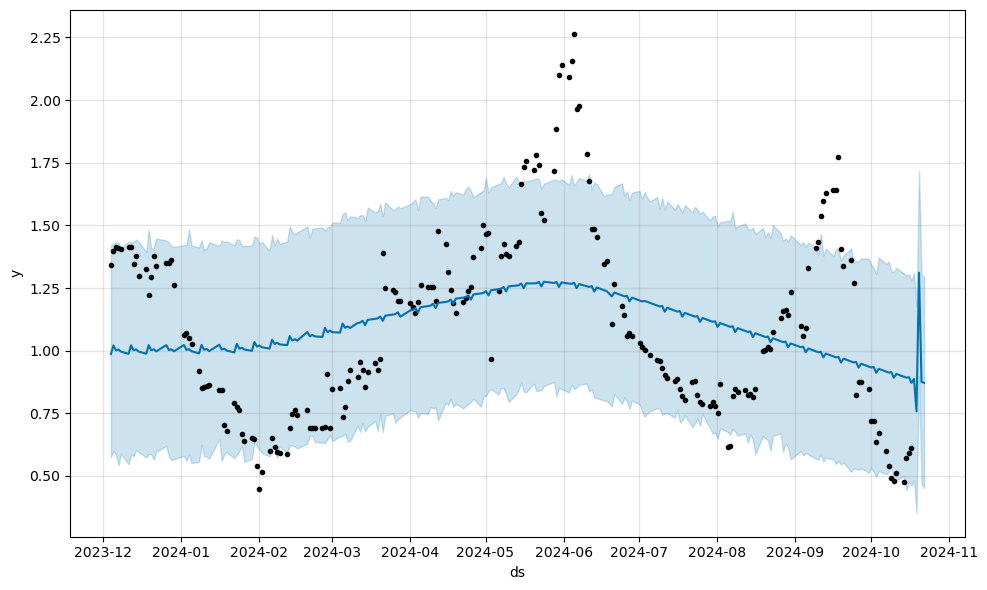

In [46]:
fig=m.plot(forecast)

Seems really off; there is some seeming seasonality but Prophet doesn't seem to detect it. Weird jump at the end

## Doing the same thing but with a random collection of tickers

In [3]:
import bs4 as bs
import requests
from random import randrange 

In [4]:
def get_tickers():
    
    # Scrape the Wikipedia page related to the S&P500 
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []

    # Import stock tickers
    for row in table.findAll('tr')[2:]: 
        ticker = row.findAll('td')[1].text
        tickers.append(ticker)

    # Store stock tickers into a list while cleaning white space
    tickers = [s.replace('\n', '') for s in tickers]
    
    return tickers

In [5]:
# Pick a random stock (without repetition) from a list
def random_picker(list):   
    i = randrange(len(list))
    random_stock = list[i]
    
    return random_stock

In [6]:
list = get_tickers()

In [7]:
prices = []

In [9]:
n=10
stock_names=[]
for _ in range(n):
    name =random_picker(list)
    stock_names.append(name)
    ticker = yf.Ticker(name)
    stock_prices = ticker.history(period="1mo")
    prices.append(stock_prices)

Could not get exchangeTimezoneName for ticker '' reason: 'chart'
$: possibly delisted; no price data found  (period=1mo)
$ARG: possibly delisted; no price data found  (period=1mo)
$AYE: possibly delisted; no price data found  (period=1mo)


In [10]:
stock_names # seems there is random selection with replacement

['MTCH', 'NWSA', '', 'RJF', 'ARG', 'FICO', 'AYE', 'VNT', 'TFX', 'FICO']

In [12]:
# Concatenate the 'Close' columns
combined = pd.concat([df['Close'] for df in prices], axis=1)

# Rename columns for clarity
#combined.columns = [f'Stock{i+1}' for i in range(len(prices))]
combined.columns = stock_names


# Calculate the average 'Close' price for each day
combined['Average_Close'] = combined.mean(axis=1)

In [13]:
combined.head()

,MTCH,NWSA,,RJF,ARG,FICO,AYE,VNT,TFX,FICO,Average_Close
Date,,,,,,,,,,,
2024-11-04 00:00:00-05:00,36.230000,27.420000,NaN,145.350006,NaN,1990.939941,NaN,37.055210,206.960510,1990.939941,633.556516
2024-11-05 00:00:00-05:00,36.939999,27.850000,NaN,146.449997,NaN,2009.750000,NaN,37.984585,203.137329,2009.750000,638.837416
2024-11-06 00:00:00-05:00,37.880001,28.950001,NaN,160.789993,NaN,2090.629883,NaN,39.993240,201.560135,2090.629883,664.347591
2024-11-07 00:00:00-05:00,31.110001,29.160000,NaN,156.429993,NaN,2176.100098,NaN,40.422955,197.677078,2176.100098,686.714317
2024-11-08 00:00:00-05:00,30.559999,29.520000,NaN,158.729996,NaN,2332.290039,NaN,40.023220,195.201492,2332.290039,731.230684
